# **Mobile Legend Reviews Sentiment Analysis**
Goal
  - Analisis klasifikasi pengalaman positif dalam memainkan game mobile legend atau negatif

Analytical Approach
  1. Text mining review aplikasi mobile legend melalui playstore
  2. Text preprocessing pada hasil mining
  3. Melabelkan variabel menjadi negatif atau positif untuk target uji
  4. Melakukan uji latih dengan target 'accuracy'
  5. Melakukan inferential analisis atau percobaan pada data uji dengan data baru

In [1]:
!pip install google-play-scraper

from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

import datetime as dt
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
nltk.download('stopwords')
nltk.download('punkt')

from wordcloud import WordCloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Data Scraping

In [2]:
from google_play_scraper import app, reviews_all, Sort

scrapreview = reviews_all(
    'com.mobile.legends',
    sleep_milliseconds=0,
    lang='id',
    country='id',
    sort=Sort.NEWEST,
    count=3000,
    filter_score_with=None
)


In [3]:
import csv

with open('app_review.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])
    for review in scrapreview:
        writer.writerow([review['content']])

In [4]:
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.to_csv('reviews_mobilelegends.csv', index=False)

In [5]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,5764b83d-80e1-4fe5-aae3-6f2b352472d1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Masuk game gk bisa2. Sekalinya masuk ping mera...,1,0,19.2.21.104,2024-11-04 08:56:14,None,NaT,19.2.21.104
1,29bb3725-8996-4d98-b73b-4d023a679901,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Gausah download game bikin stres doang, mendin...",1,1,None,2024-11-04 08:56:00,None,NaT,None
2,e37edf95-cd34-40a6-a74d-3076581551df,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ls gw kasi bin1 ws gw kasi bin5,5,3,19.2.21.104,2024-11-04 08:55:42,None,NaT,19.2.21.104
3,979caa85-c467-41e5-ae93-440d95cfcfed,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,game silit,1,0,19.2.21.104,2024-11-04 08:55:31,None,NaT,19.2.21.104
4,4d579e92-b10d-4248-9f26-f95dd9b06ba5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Game asikin mazzsehh kadang bikin sterss kadan...,5,0,None,2024-11-04 08:53:35,None,NaT,None


In [6]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517500 entries, 0 to 517499
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              517500 non-null  object        
 1   userName              517500 non-null  object        
 2   userImage             517500 non-null  object        
 3   content               517500 non-null  object        
 4   score                 517500 non-null  int64         
 5   thumbsUpCount         517500 non-null  int64         
 6   reviewCreatedVersion  390163 non-null  object        
 7   at                    517500 non-null  datetime64[ns]
 8   replyContent          5336 non-null    object        
 9   repliedAt             5336 non-null    datetime64[ns]
 10  appVersion            390163 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 43.4+ MB


In [7]:
# app_reviews_df.sort_values('score', ascending=False).head(10)

# Data Cleaning

In [8]:
missing_value_percent = app_reviews_df.isnull().sum() * 100 / len(app_reviews_df)
missing_value_percent

,0
reviewId,0.000000
userName,0.000000
userImage,0.000000
content,0.000000
score,0.000000
thumbsUpCount,0.000000
reviewCreatedVersion,24.606184
at,0.000000
replyContent,98.968889
repliedAt,98.968889


In [9]:
clean_df = app_reviews_df.dropna(subset=['appVersion'])
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390163 entries, 0 to 517499
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              390163 non-null  object        
 1   userName              390163 non-null  object        
 2   userImage             390163 non-null  object        
 3   content               390163 non-null  object        
 4   score                 390163 non-null  int64         
 5   thumbsUpCount         390163 non-null  int64         
 6   reviewCreatedVersion  390163 non-null  object        
 7   at                    390163 non-null  datetime64[ns]
 8   replyContent          4226 non-null    object        
 9   repliedAt             4226 non-null    datetime64[ns]
 10  appVersion            390163 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 35.7+ MB


Dikarenakan pada 'replyContent' data yang hilang mencapai 99%, maka untuk mengurangi banyaknya informasi yang hilang akan dihapus data yang hilang pada subset tertentu saja.

In [10]:
clean_df = clean_df.drop_duplicates()
clean_df.info()
clean_df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 390163 entries, 0 to 517499
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              390163 non-null  object        
 1   userName              390163 non-null  object        
 2   userImage             390163 non-null  object        
 3   content               390163 non-null  object        
 4   score                 390163 non-null  int64         
 5   thumbsUpCount         390163 non-null  int64         
 6   reviewCreatedVersion  390163 non-null  object        
 7   at                    390163 non-null  datetime64[ns]
 8   replyContent          4226 non-null    object        
 9   repliedAt             4226 non-null    datetime64[ns]
 10  appVersion            390163 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 35.7+ MB


(390163, 11)

In [11]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()

    stemmed_words = [stemmer.stem(word) for word in words]

    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [12]:
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

clean_df['text_tokenizingText'] = clean_df['text_casefoldingText'].apply(tokenizingText)

clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [13]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_tokenizingText,text_stopword,text_akhir
0,5764b83d-80e1-4fe5-aae3-6f2b352472d1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Masuk game gk bisa2. Sekalinya masuk ping mera...,1,0,19.2.21.104,2024-11-04 08:56:14,None,NaT,19.2.21.104,Masuk game gk bisa Sekalinya masuk ping merah ...,masuk game gk bisa sekalinya masuk ping merah ...,"[masuk, game, gk, bisa, sekalinya, masuk, ping...","[masuk, game, gk, sekalinya, masuk, ping, merah]",masuk game gk sekalinya masuk ping merah
2,e37edf95-cd34-40a6-a74d-3076581551df,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ls gw kasi bin1 ws gw kasi bin5,5,3,19.2.21.104,2024-11-04 08:55:42,None,NaT,19.2.21.104,Ls gw kasi bin ws gw kasi bin,ls gw kasi bin ws gw kasi bin,"[ls, gw, kasi, bin, ws, gw, kasi, bin]","[ls, gw, kasi, bin, ws, gw, kasi, bin]",ls gw kasi bin ws gw kasi bin
3,979caa85-c467-41e5-ae93-440d95cfcfed,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,game silit,1,0,19.2.21.104,2024-11-04 08:55:31,None,NaT,19.2.21.104,game silit,game silit,"[game, silit]","[game, silit]",game silit
5,5d983e2a-e4b5-4b15-a15e-290283425621,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,game bagus ga toxic ramah bintang 5 dehhh mont...,5,0,19.2.21.104,2024-11-04 08:52:38,None,NaT,19.2.21.104,game bagus ga toxic ramah bintang dehhh monto...,game bagus ga toxic ramah bintang dehhh monto...,"[game, bagus, ga, toxic, ramah, bintang, dehhh...","[game, bagus, toxic, ramah, bintang, dehhh, mo...",game bagus toxic ramah bintang dehhh monton tp...
6,e407dd18-00c0-4dcd-ad91-df775c73604b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Dulu saya suka karena bisa tanpa kouta Tapi se...,5,0,19.2.21.104,2024-11-04 08:52:18,None,NaT,19.2.21.104,Dulu saya suka karena bisa tanpa kouta Tapi se...,dulu saya suka karena bisa tanpa kouta tapi se...,"[dulu, saya, suka, karena, bisa, tanpa, kouta,...","[suka, kouta, ulan, kouta, dowlad, ml, hapus, ...",suka kouta ulan kouta dowlad ml hapus ml dowla...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517492,0014d457-055e-4cac-8242-31bfe3e828d1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sangat bagus untuk menaikan emosi,5,0,1.8.79.9552,2024-06-30 13:56:20,None,NaT,1.8.79.9552,Sangat bagus untuk menaikan emosi,sangat bagus untuk menaikan emosi,"[sangat, bagus, untuk, menaikan, emosi]","[bagus, menaikan, emosi]",bagus menaikan emosi
517496,435cb8a5-a666-48f8-ba64-ac7fbaaa4e78,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Banyak drak sistem monton babyyii,1,0,1.8.58.9312,2024-06-30 13:56:00,None,NaT,1.8.58.9312,Banyak drak sistem monton babyyii,banyak drak sistem monton babyyii,"[banyak, drak, sistem, monton, babyyii]","[drak, sistem, monton, babyyii]",drak sistem monton babyyii
517497,619fb9bb-25ba-48f1-a10b-10d8c258c306,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagus,5,0,1.8.47.9191,2024-06-30 13:55:51,None,NaT,1.8.47.9191,Bagus,bagus,[bagus],[bagus],bagus
517498,08a043ba-02d5-4ea5-b858-67573d83a833,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Moonton ga bener!!!,1,0,1.8.80.9553,2024-06-30 13:55:42,None,NaT,1.8.80.9553,Moonton ga bener,moonton ga bener,"[moonton, ga, bener]","[moonton, bener]",moonton bener


In [14]:
import requests
from io import StringIO

lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
         lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")


lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

In [15]:
def sentiment_analysis_lexicon_indonesia(text):

    score = 0

    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]

    for word in text:

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity=''

    if (score >= 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    # else:
    #     polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity

In [16]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    218357
negative    171806
Name: count, dtype: int64


In [17]:
clean_df['label'] = clean_df['polarity'].map({'positive': 1, 'negative': 0})

clean_df.head()

clean_df.to_csv('reviews_mobilelegends_labeled.csv', index=False)

In [19]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,label
0,5764b83d-80e1-4fe5-aae3-6f2b352472d1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Masuk game gk bisa2. Sekalinya masuk ping mera...,1,0,19.2.21.104,2024-11-04 08:56:14,None,NaT,19.2.21.104,Masuk game gk bisa Sekalinya masuk ping merah ...,masuk game gk bisa sekalinya masuk ping merah ...,"[masuk, game, gk, bisa, sekalinya, masuk, ping...","[masuk, game, gk, sekalinya, masuk, ping, merah]",masuk game gk sekalinya masuk ping merah,-3,negative,0
2,e37edf95-cd34-40a6-a74d-3076581551df,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ls gw kasi bin1 ws gw kasi bin5,5,3,19.2.21.104,2024-11-04 08:55:42,None,NaT,19.2.21.104,Ls gw kasi bin ws gw kasi bin,ls gw kasi bin ws gw kasi bin,"[ls, gw, kasi, bin, ws, gw, kasi, bin]","[ls, gw, kasi, bin, ws, gw, kasi, bin]",ls gw kasi bin ws gw kasi bin,-6,negative,0
3,979caa85-c467-41e5-ae93-440d95cfcfed,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,game silit,1,0,19.2.21.104,2024-11-04 08:55:31,None,NaT,19.2.21.104,game silit,game silit,"[game, silit]","[game, silit]",game silit,2,positive,1
5,5d983e2a-e4b5-4b15-a15e-290283425621,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,game bagus ga toxic ramah bintang 5 dehhh mont...,5,0,19.2.21.104,2024-11-04 08:52:38,None,NaT,19.2.21.104,game bagus ga toxic ramah bintang dehhh monto...,game bagus ga toxic ramah bintang dehhh monto...,"[game, bagus, ga, toxic, ramah, bintang, dehhh...","[game, bagus, toxic, ramah, bintang, dehhh, mo...",game bagus toxic ramah bintang dehhh monton tp...,5,positive,1
6,e407dd18-00c0-4dcd-ad91-df775c73604b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Dulu saya suka karena bisa tanpa kouta Tapi se...,5,0,19.2.21.104,2024-11-04 08:52:18,None,NaT,19.2.21.104,Dulu saya suka karena bisa tanpa kouta Tapi se...,dulu saya suka karena bisa tanpa kouta tapi se...,"[dulu, saya, suka, karena, bisa, tanpa, kouta,...","[suka, kouta, ulan, kouta, dowlad, ml, hapus, ...",suka kouta ulan kouta dowlad ml hapus ml dowla...,2,positive,1


# Word Cloud

## Bag of Words pada polaritas positif

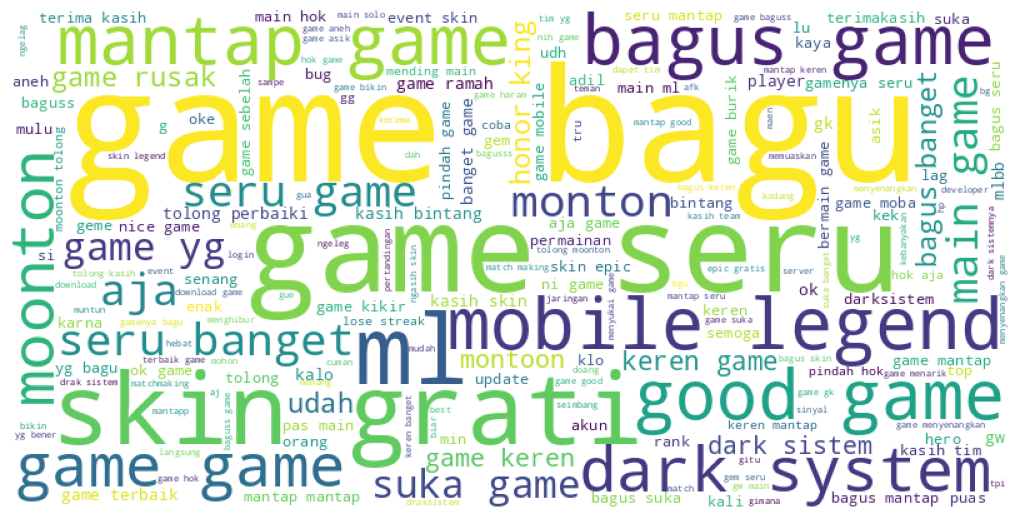

In [18]:
positive_reviews = clean_df[clean_df['polarity'] == 'positive']['text_akhir']

positive_text = ' '.join(positive_reviews)

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud_positive)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Bag of Words pada polaritas negatif

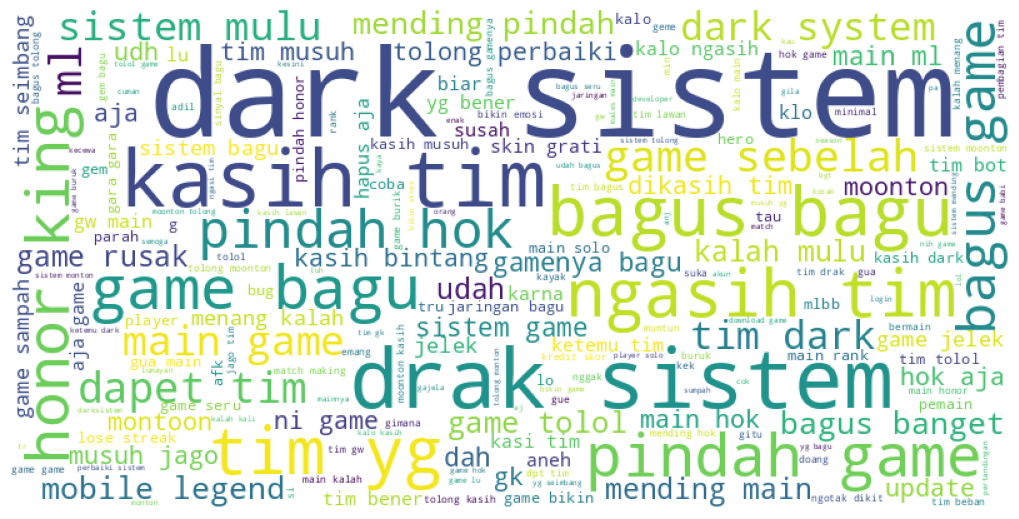

In [20]:
negative_reviews = clean_df[clean_df['polarity'] == 'negative']['text_akhir']

negative_text = ' '.join(negative_reviews)

wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud_negative)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Splitting Data & TF-IDF

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split

X = clean_df['text_akhir']
y = clean_df['polarity']

tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

features_df

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Modeling

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

model_names = []
score = []
train_score = []
std_value = []

models = {
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=100)
}

for current_model_name, model in models.items():
    print(f"Cross-validation for {current_model_name}...")
    scores = cross_val_score(model, X_tfidf, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    print(f"Accuracy scores: {scores}")
    print(f"Mean accuracy: {scores.mean()}")
    print(f"Standard deviation: {scores.std()}")
    print("-" * 30)

    score.append(scores)
    train_score.append(scores.mean())
    std_value.append(scores.std())
    model_names.append(current_model_name)

Cross-validation for Naive Bayes...
Accuracy scores: [0.84574475 0.87204132 0.84142606 0.86957915 0.81934335]
Mean accuracy: 0.8496269243076476
Standard deviation: 0.019493161061758434
------------------------------
Cross-validation for Random Forest...
Accuracy scores: [0.89093076 0.91411326 0.8968257  0.90421878 0.87774246]
Mean accuracy: 0.8967661936904815
Standard deviation: 0.012267190950120013
------------------------------
Cross-validation for Decision Tree...
Accuracy scores: [0.86600541 0.89653095 0.87659067 0.8768454  0.85129178]
Mean accuracy: 0.8734528420980213
Standard deviation: 0.014835981587078894
------------------------------
Cross-validation for Logistic Regression...
Accuracy scores: [0.90006792 0.91336998 0.90323325 0.91151066 0.89235186]
Mean accuracy: 0.9041067339779782
Standard deviation: 0.007692569483571695
------------------------------


In [25]:
benchmark_model_train = pd.DataFrame({
    'model':model_names,
    'train_score':train_score,
    'std':std_value}).sort_values(by='train_score',ascending=False)

benchmark_model_train

,model,train_score,std
3,Logistic Regression,0.904107,0.007693
1,Random Forest,0.896766,0.012267
2,Decision Tree,0.873453,0.014836
0,Naive Bayes,0.849627,0.019493


In [30]:
test_score = []
model_names = []

for current_model_name, model in models.items():
    # predict
    y_pred_test = model.fit(X_train, y_train).predict(X_test)

    # evaluate
    accuracy = accuracy_score(y_test, y_pred_test)
    test_score.append(accuracy)
    model_names.append(current_model_name)

In [31]:
benchmark_model_test = pd.DataFrame({
    'model':model_names,
    'test_score':test_score,
    }).sort_values(by='test_score',ascending=False)

benchmark_model_test

,model,test_score
3,Logistic Regression,0.905771
1,Random Forest,0.897928
2,Decision Tree,0.873092
0,Naive Bayes,0.853088


In [32]:
benchmark_model = benchmark_model_test.set_index('model').join(benchmark_model_train.set_index('model'))
benchmark_model.drop('std',axis=1,inplace=True)
benchmark_model['diff'] = benchmark_model['test_score'] - benchmark_model['train_score']
benchmark_model['diff'] = benchmark_model['diff'].agg('abs')
benchmark_model.sort_values(by='test_score',ascending=False)

,test_score,train_score,diff
model,,,
Logistic Regression,0.905771,0.904107,0.001664
Random Forest,0.897928,0.896766,0.001162
Decision Tree,0.873092,0.873453,0.000361
Naive Bayes,0.853088,0.849627,0.003461


model dengan performa terbaik = **Logistic Regression**

model dengan stabilitas terbaik = **Decision Tree**

Akan digunakan Logreg untuk analisis inferential karena memiliki performa terbaik dan tidak adanya overfit maupun underfit pada model.

In [39]:
logreg_model = LogisticRegression(random_state=42, max_iter=100)
logreg_model.fit(X_train, y_train)

# Sentimen = ["Negatif","Positif","Netral"]
new_review = ["Mobile Legend game jelek","Mobile Legend game bagus","Saya download game ini beberapa waktu lalu"]

new_review_tfidf = tfidf.transform(new_review)


predicted_sentiment = logreg_model.predict(new_review_tfidf)

print(f"The predicted sentiment for the new review is: {predicted_sentiment}")

predicted_probabilities = logreg_model.predict_proba(new_review_tfidf)
print(f"Probabilities: {predicted_probabilities}")

The predicted sentiment for the new review is: ['negative' 'positive' 'positive']
Probabilities: [[0.90896036 0.09103964]
 [0.30538524 0.69461476]
 [0.17165653 0.82834347]]


Kesimpulan:
1. Review faktual negatif
  - hasil = negatif
  - probabilitas = [negatif:90%,positif:10%]
2. Review faktual positif
  - hasil = positif
  - probabilitas = [negatif:30%,positif:70%]
3. Review faktual netral (kondisi berimbang)
  - hasil = positif
  - probabilitas = [negatif:17%,positif:83%]

In [40]:
pip freeze > requirements.txt